In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#  Fashion MNIST dataset 호출
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f'Training images shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing images shape: {x_test.shape}')
print(f'Testing labels shape: {y_test.shape}')

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


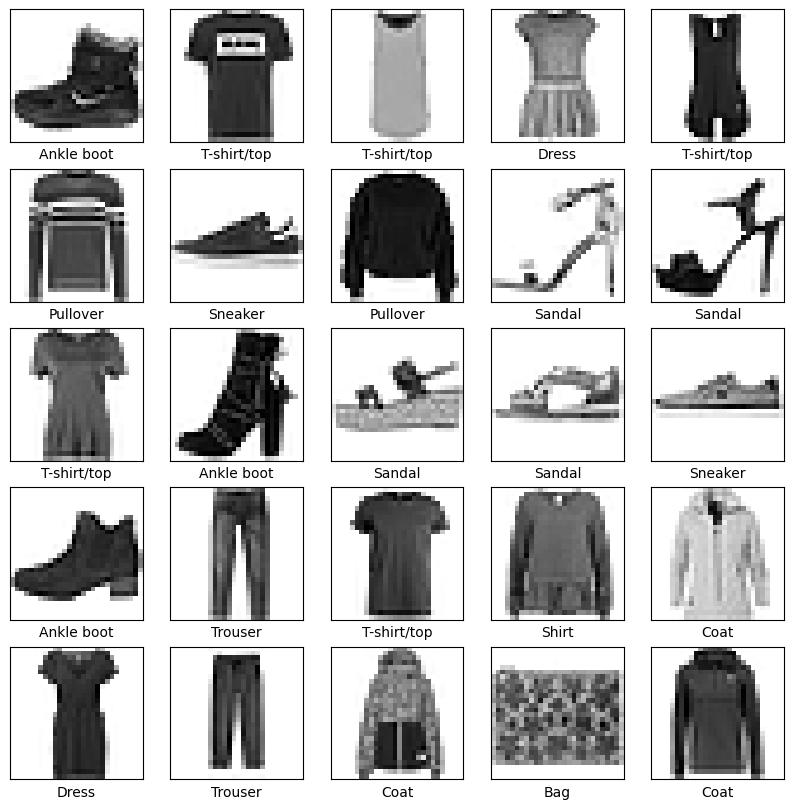

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
# 이미지 normalize -> 픽셀 값이 0~255 사이의 값을 갖는데, 0-1 사이의 값을 갖도록 정규화
# 균일한 값을 갖도록 정규화함으로써 빠르고 효율적인 학습
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN 입력을 위해 입력 셰이프 재가공
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Fashion MNIST dataset은 10개의 상품 클래스가 존재
num_classes = 10
batch_size = 500
epochs = 10

In [7]:
# 모델 정의
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2025-04-15 16:02:41.673127: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-15 16:02:41.673977: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
# 모델 컴파일
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
# 과적합 방지
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
# 모델 학습
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/10


2025-04-15 16:02:58.090262: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-04-15 16:02:58.410067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/120 [============================>.] - ETA: 0s - loss: 0.9256 - accuracy: 0.6767

2025-04-15 16:03:04.118711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 6s 23ms/step - loss: 0.9202 - accuracy: 0.6784 - val_loss: 0.5185 - val_accuracy: 0.8076
Epoch 2/10
120/120 [==============================] - 2s 20ms/step - loss: 0.5173 - accuracy: 0.8131 - val_loss: 0.4371 - val_accuracy: 0.8375
Epoch 3/10
120/120 [==============================] - 2s 21ms/step - loss: 0.4480 - accuracy: 0.8400 - val_loss: 0.3905 - val_accuracy: 0.8530
Epoch 4/10
120/120 [==============================] - 2s 20ms/step - loss: 0.4085 - accuracy: 0.8529 - val_loss: 0.3663 - val_accuracy: 0.8648
Epoch 5/10
120/120 [==============================] - 2s 21ms/step - loss: 0.3774 - accuracy: 0.8637 - val_loss: 0.3516 - val_accuracy: 0.8722
Epoch 6/10
120/120 [==============================] - 2s 20ms/step - loss: 0.3600 - accuracy: 0.8701 - val_loss: 0.3356 - val_accuracy: 0.8760
Epoch 7/10
120/120 [==============================] - 2s 20ms/step - loss: 0.3410 - accuracy: 0.8776 - val_loss: 0.3294 - val_accuracy: 0.8776
Epoch 8/10

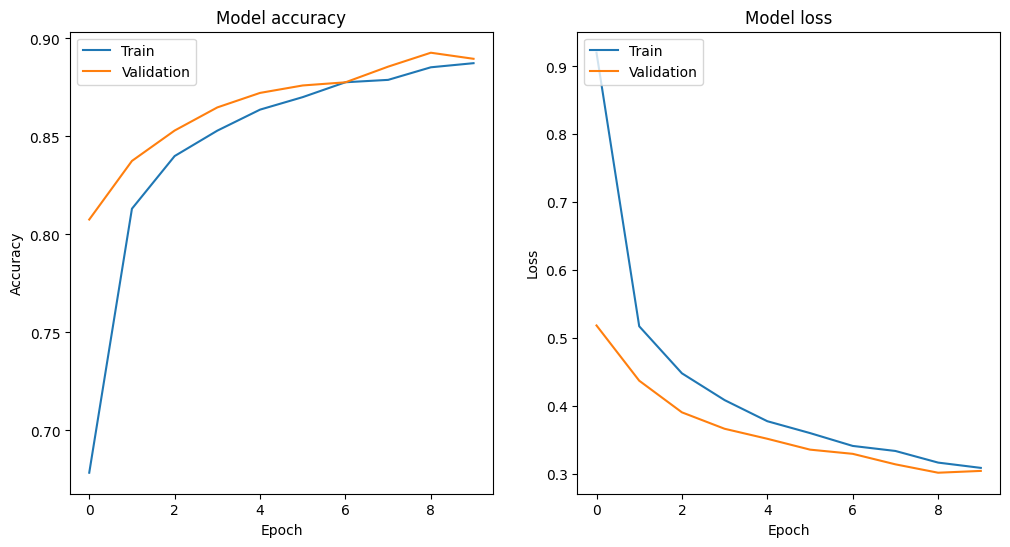

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 학습/검증 성능 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# 로스 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [13]:
# 유저가 구매한 상품을 기반으로 비슷한 상품 추천
# 단순한 상황을 가정해, 유저가 하나의 아이템을 구매했다고 가정

user_purchases = {
    'user1': [44],
    'user2': [68],
    'user3': [13],
}

# 최종 출력 이전 레이어에서 출력값을 받아옴 -> 이미지의 hidden representation 획득
model_without_last_layer = tf.keras.Model(model.inputs, model.layers[-2].output)

In [14]:
model_without_last_layer

In [15]:
# 가장 가까운 n개의 아이템 조회
num_similar_items = 5

# 비교를 위해, 전체 아이템 중 100개의 아이템 랜덤 샘플링
random_indices = np.random.choice(len(x_train), 100, replace=False)

# 각각 랜덤 샘플된 아이템으로부터 임베딩을 계산 (모델에 투입함으로써))
random_item_embeddings = model_without_last_layer.predict(x_train[random_indices])


1/4 [======>.......................] - ETA: 0s

2025-04-15 16:06:13.645505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 190ms/step


In [16]:
random_item_embeddings[:1]

array([[0.        , 1.0963925 , 0.        , 4.28264   , 0.        ,
        0.        , 4.0228453 , 0.        , 0.        , 0.        ,
        0.        , 1.255661  , 4.18682   , 0.        , 3.0406628 ,
        0.4873491 , 0.        , 0.        , 0.        , 2.7833643 ,
        0.        , 0.        , 3.2722032 , 0.        , 0.        ,
        0.        , 0.        , 1.3116071 , 1.2676207 , 0.        ,
        0.        , 0.        , 0.8973211 , 3.060467  , 2.2208338 ,
        0.        , 3.2616353 , 3.517384  , 3.3496487 , 0.        ,
        0.        , 0.        , 1.7489383 , 5.1733947 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6731194 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7645395 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 3.6749887 ,
        0.        , 0.8019234 , 3.0848    , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [17]:
user_purchases.items()

dict_items([('user1', [44]), ('user2', [68]), ('user3', [13])])

1/1 [==============================] - 1s 688ms/step

Purchased item by user1:


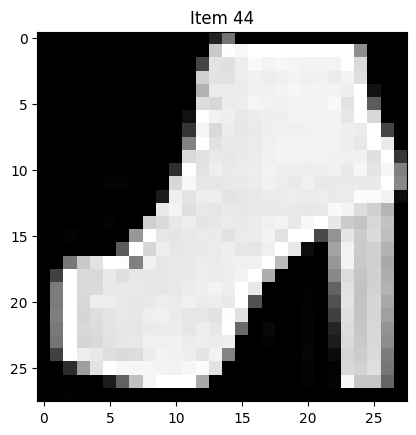

Most similar items to those purchased by user1:


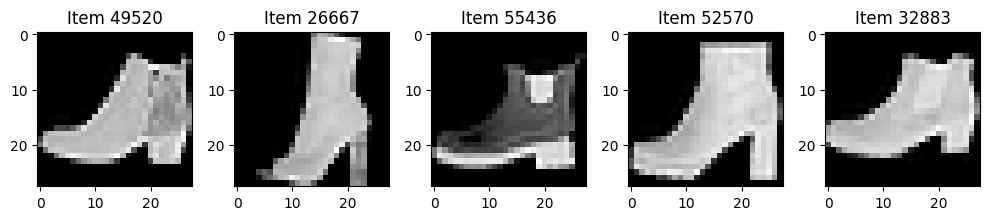

1/1 [==============================] - 0s 12ms/step

Purchased item by user2:


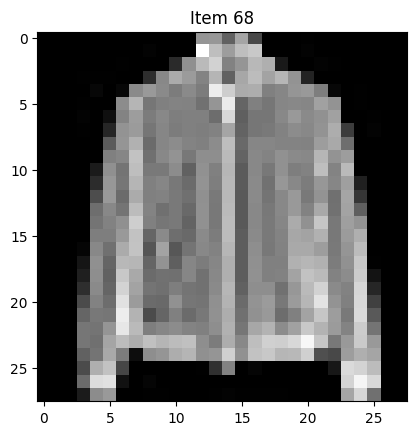

Most similar items to those purchased by user2:


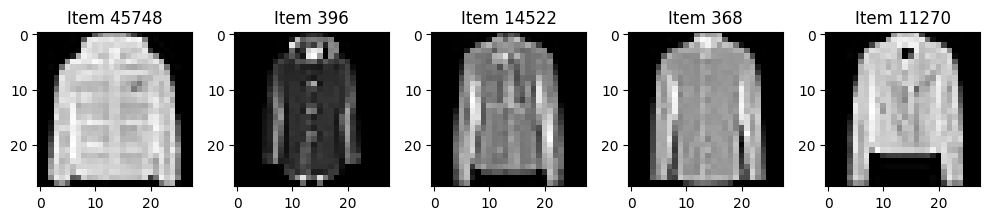

1/1 [==============================] - 0s 10ms/step

Purchased item by user3:


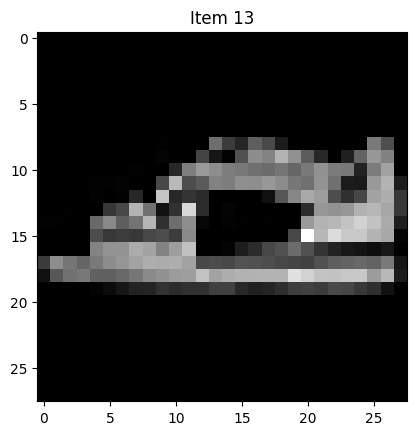

Most similar items to those purchased by user3:


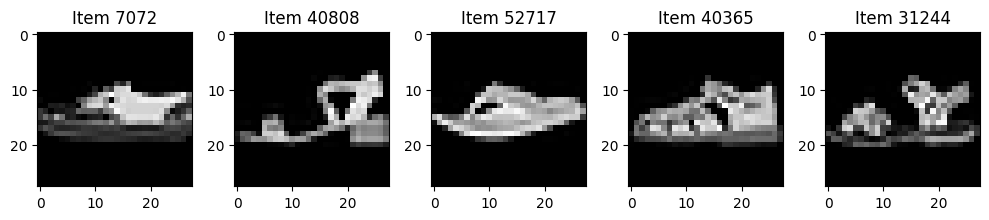

In [18]:
for user, item_indices in user_purchases.items():
    # 각 유저가 구매한 아이템 임베딩 계산
    user_item_embeddings = model_without_last_layer.predict(x_train[np.array(item_indices)].reshape(-1, 28, 28, 1))

    # 유저의 아이템과 랜덤샘플된 아이템의 유사도 계산
    similarity = cosine_similarity(user_item_embeddings, random_item_embeddings)

    # 가장 유사한 아이템 n개의 인덱스
    top_similar_indices = np.argsort(similarity[0])[-num_similar_items:]

    # 유저에 의해 구매한 아이템의 이미지 출력
    print(f"\nPurchased item by {user}:")
    plt.imshow(x_train[item_indices[0]].reshape(28, 28), cmap='gray')
    plt.title(f"Item {item_indices[0]}")
    plt.show()

    # 해당 아이템과 유사한 top n개의 이미지 출력
    print(f"Most similar items to those purchased by {user}:")
    fig, axes = plt.subplots(1, num_similar_items, figsize=(10, 10))
    for idx, ax in zip(top_similar_indices, axes.flatten()):
        # 시각화
        ax.imshow(x_train[random_indices[idx]].reshape(28, 28), cmap='gray')
        ax.title.set_text(f"Item {random_indices[idx]}")
    plt.tight_layout()
    plt.show()


157/157 [==============================] - 0s 3ms/step


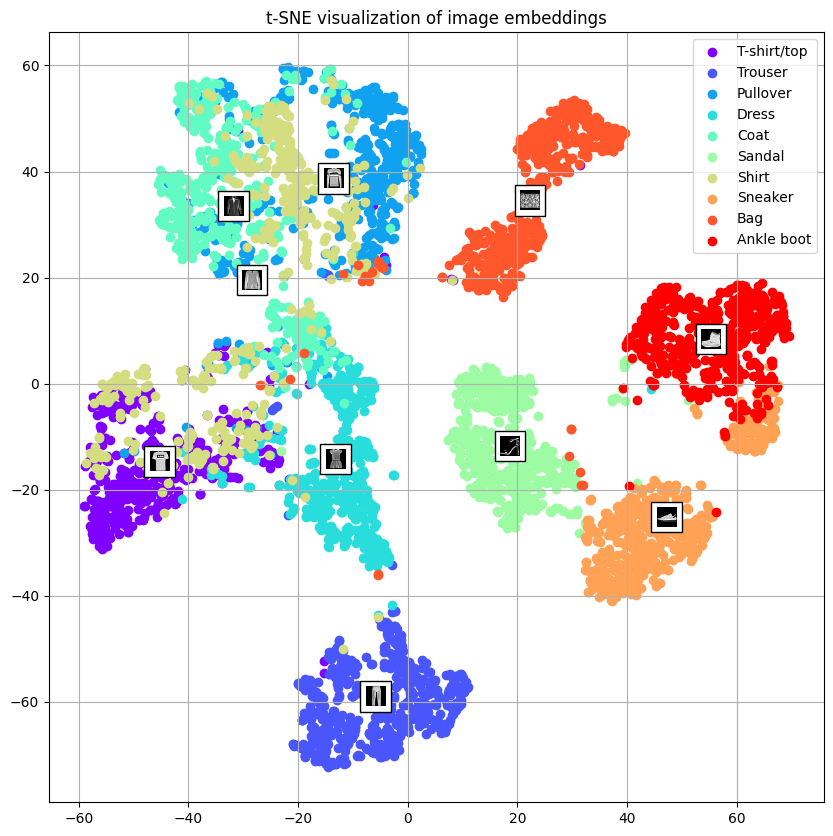

In [19]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy import ndimage

# 일부 샘플들만 가져오기
subset_size = 5000
x_subset = x_train[:subset_size]
y_subset = y_train[:subset_size]

# 임베딩 생성
subset_embeddings = model_without_last_layer.predict(x_subset)

# 차원 축소를 위한 t-SNE
tsne = TSNE(n_components=2, random_state=0)
subset_embeddings_2d = tsne.fit_transform(subset_embeddings)


# 시각화
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, num_classes))

for i in range(num_classes):
    idxs = (y_subset == i)
    centroid = np.mean(subset_embeddings_2d[idxs], axis=0)
    plt.scatter(subset_embeddings_2d[idxs, 0], subset_embeddings_2d[idxs, 1], color=colors[i], label=class_names[i])

    # 중심점에 이미지 위치시키기
    imagebox = OffsetImage(x_subset[idxs][0].reshape(28,28), zoom=0.5, cmap='gray')
    ab = AnnotationBbox(imagebox, centroid)
    plt.gca().add_artist(ab)

plt.legend(loc='best')
plt.title('t-SNE visualization of image embeddings')
plt.grid(True)
plt.show()
